In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [13]:
!pip install statsmodels


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [14]:
air=pd.read_excel("Airlines_Data.xlsx", sheet_name='Sheet1')
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [15]:
air.shape

(96, 2)

In [16]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


### Visualization using the Data which we have

In [17]:
df=air.copy()

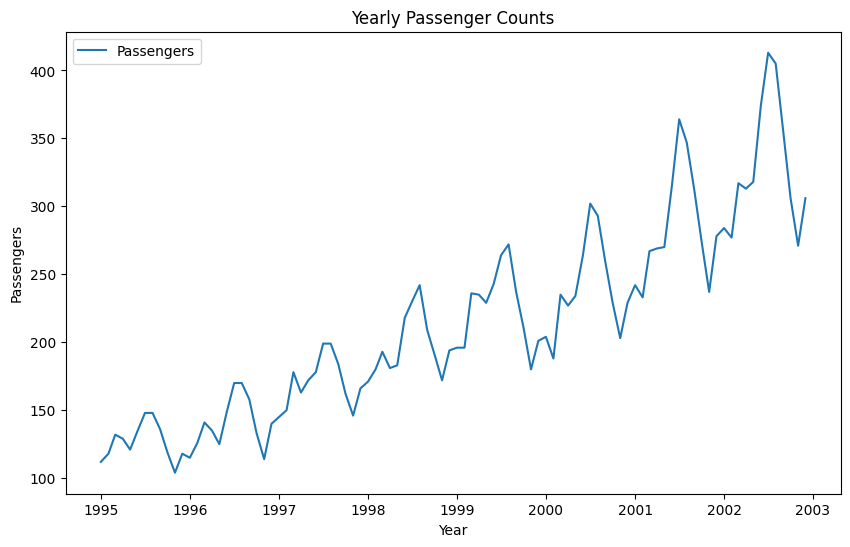

In [18]:
#Month is Date time which is used for TimeSeries
df['Year'] = pd.to_datetime(df['Month'])

# Set 'Month' column as index
df.set_index('Month', inplace=True)

# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], label='Passengers')
plt.title('Yearly Passenger Counts')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()



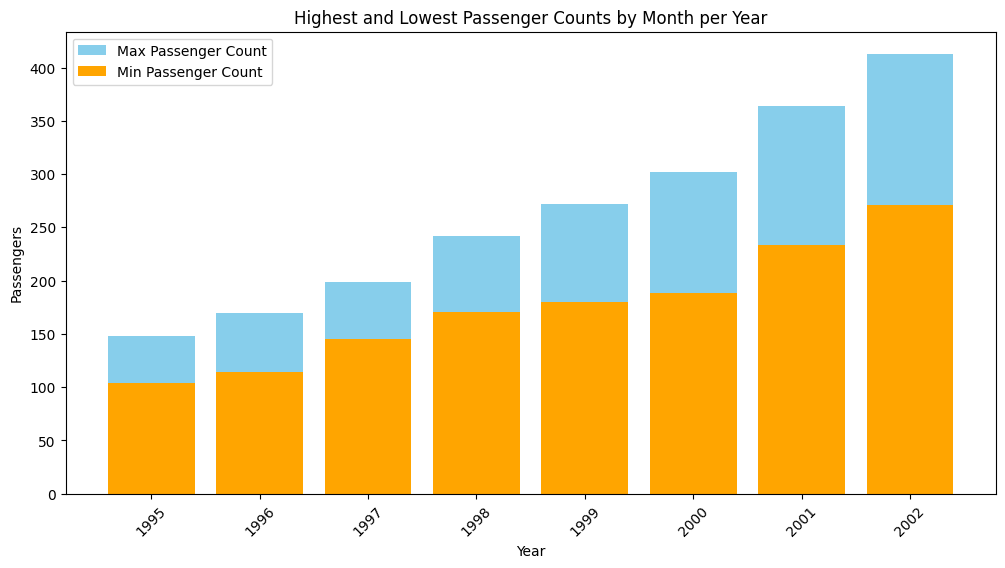

In [19]:
df=air.copy()
# Convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Extract year and month from the 'Month' column
df['Year'] = df['Month'].dt.year
df['Month_Num'] = df['Month'].dt.month

# Group by year and month, and find the maximum and minimum passenger counts
max_passengers_per_month = df.groupby(['Year', 'Month_Num'])['Passengers'].max()
min_passengers_per_month = df.groupby(['Year', 'Month_Num'])['Passengers'].min()

# Find the corresponding month names for maximum and minimum passenger counts
max_month_names = max_passengers_per_month.reset_index().groupby('Year')['Month_Num'].idxmax().apply(lambda x: pd.to_datetime(x).strftime('%B'))
min_month_names = min_passengers_per_month.reset_index().groupby('Year')['Month_Num'].idxmin().apply(lambda x: pd.to_datetime(x).strftime('%B'))

# Plotting
plt.figure(figsize=(12, 6))

# Plotting maximum passenger counts
plt.bar(max_month_names.index, max_passengers_per_month.groupby('Year').max(), color='skyblue', label='Max Passenger Count')

# Plotting minimum passenger counts
plt.bar(min_month_names.index, min_passengers_per_month.groupby('Year').min(), color='orange', label='Min Passenger Count')

plt.title('Highest and Lowest Passenger Counts by Month per Year')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.xticks(rotation=45)
plt.show()

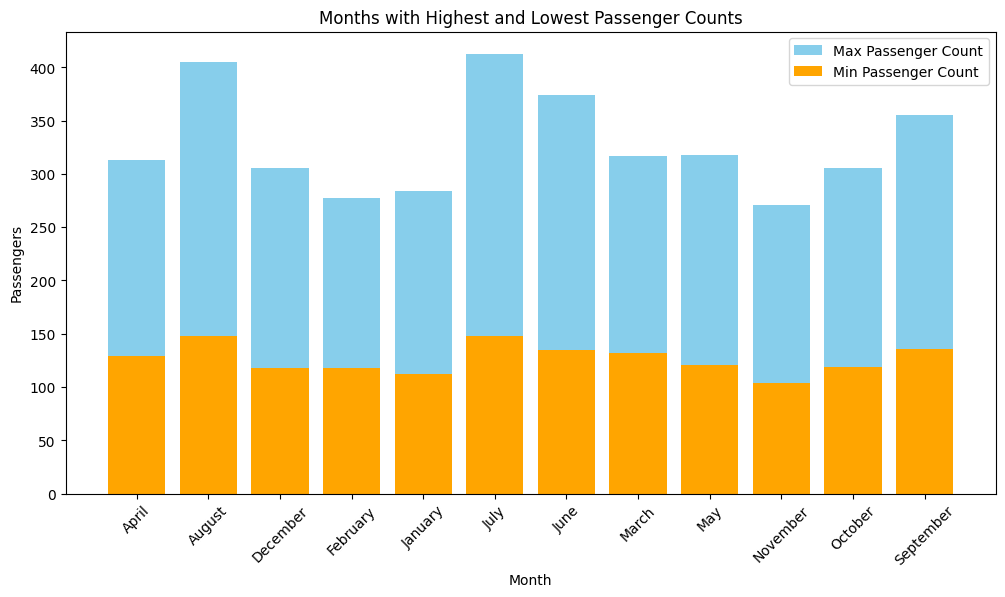

In [20]:
#Which months have highest passenger count and lowest passenger count
#the minimum and maximum passenger counts for each month across all years.

# Convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Extract month from the 'Month' column
df['Month_Name'] = df['Month'].dt.strftime('%B')

# Group by month and find the minimum and maximum passenger counts
min_passengers_per_month = df.groupby('Month_Name')['Passengers'].min()
max_passengers_per_month = df.groupby('Month_Name')['Passengers'].max()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting maximum passenger counts
plt.bar(max_passengers_per_month.index, max_passengers_per_month, color='skyblue', label='Max Passenger Count')

# Plotting minimum passenger counts
plt.bar(min_passengers_per_month.index, min_passengers_per_month, color='orange', label='Min Passenger Count')

plt.title('Months with Highest and Lowest Passenger Counts')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Insights
  1) Year vs Passenger- If we look at the passengers per year graph, we can see that per year how the maximum and min changed, what we can predict from this is that Min values per year will always go up as well as maximum. This can help the airlines to decide upon the budget or min value they can get from future years.

  2) Month vs Passenger- If we look at the passengers per month for every year in the data we can expect certain months to have the highest pessengers maybe because of holidays whereas lowest in sime because of work.

Components of Seasonal Decomposition:

- **Trend (T):** Represents the long-term movement or overall direction of the time series. It captures the underlying growth or decline.
- **Seasonal (S):** Captures the repetitive patterns that occur at fixed intervals (e.g., daily, monthly, yearly). These patterns are often related to seasonal effects (e.g., holiday sales, weather changes).
- **Residual (e):** Represents the noise or irregular fluctuations that cannot be explained by the trend or seasonality. It includes random variations and measurement errors.


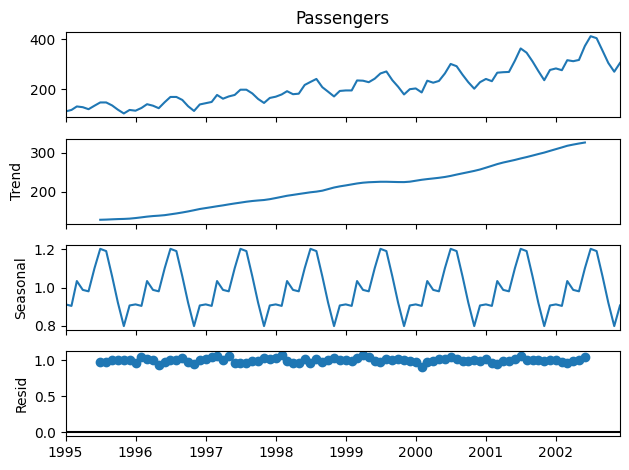

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Seasonal Decomposition

df=air.copy()
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' column as index and specify the frequency as 'MS' (Month Start)
df.set_index('Month', inplace=True)
df.index.freq = 'MS'

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

# Plot decomposition
decomposition.plot()
plt.show()

Trend Component:
- The **Trend** component represents the long-term movement or overall direction of the passenger counts.
- Looking at the trend graph, we observe a steady increase in passenger numbers over the years. This suggests a positive growth trend in air travel during the given time period (1995 to 2002).

Seasonal Component:
- The **Seasonal** component captures periodic fluctuations that repeat at regular intervals (e.g., yearly, monthly).
- In the seasonal graph, we can identify recurring patterns. These patterns may correspond to specific seasons, holidays, or other cyclic events.
- For example, if there’s a consistent peak in passenger counts around December, it could be related to holiday travel.

Residual Component (Noise):
- The **Residual** component represents the noise or irregular fluctuations that cannot be explained by the trend or seasonality.
- Ideally, we want the residual component to be random and small. If it shows any systematic patterns, it might indicate unaccounted factors affecting passenger counts.

Overall Insights:
- The upward trend suggests that air travel became more popular during this period.
- Seasonal patterns can help airlines plan for peak travel times (e.g., holidays, summer vacations).
- Residual analysis can reveal any anomalies or unexpected variations.


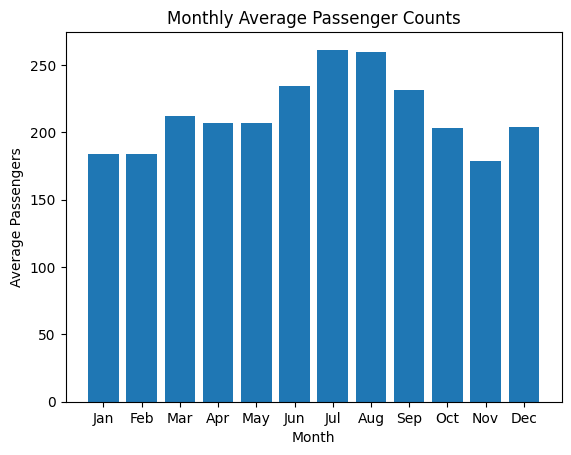

In [26]:

# Monthly Average Passenger Counts
monthly_avg = df.groupby(df.index.month).mean()
plt.bar(monthly_avg.index, monthly_avg['Passengers'])
plt.title('Monthly Average Passenger Counts')
plt.xlabel('Month')
plt.ylabel('Average Passengers')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


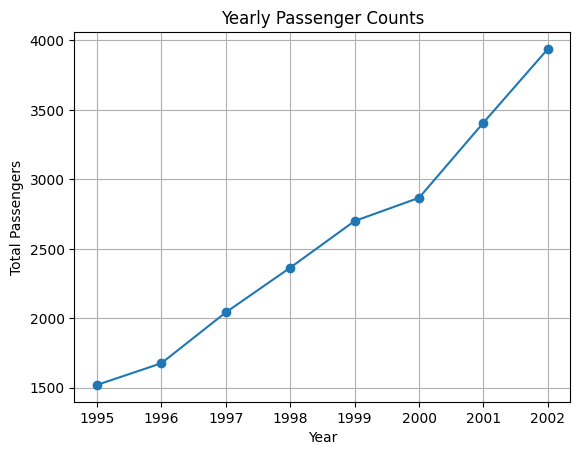

In [27]:
# Yearly Comparison
yearly_sum = df.resample('Y').sum()
plt.plot(yearly_sum.index.year, yearly_sum['Passengers'], marker='o')
plt.title('Yearly Passenger Counts')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.xticks(yearly_sum.index.year)
plt.grid(True)
plt.show()

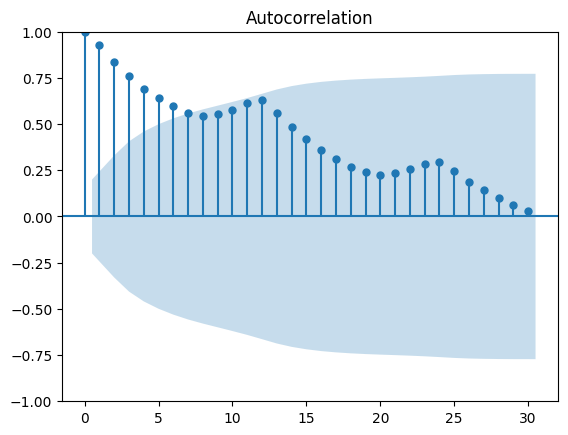

In [28]:
# Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Passengers'], lags=30)
plt.show()
# The graph shows positive autocorrelations that gradually decrease as lag increases.

- **X-axis:** Represents the lag, which is the time difference between the compared values.
- **Y-axis:** Represents the correlation coefficient, ranging from -1 to 1.
- **Blue dots connected by lines:** Represent autocorrelation coefficients at different lags.
- **Blue shaded region:** Indicates confidence intervals; values outside this area are considered statistically significant.


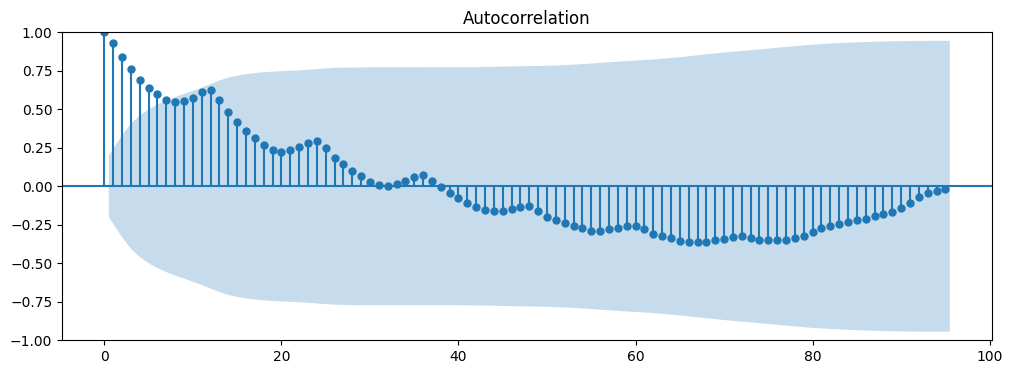

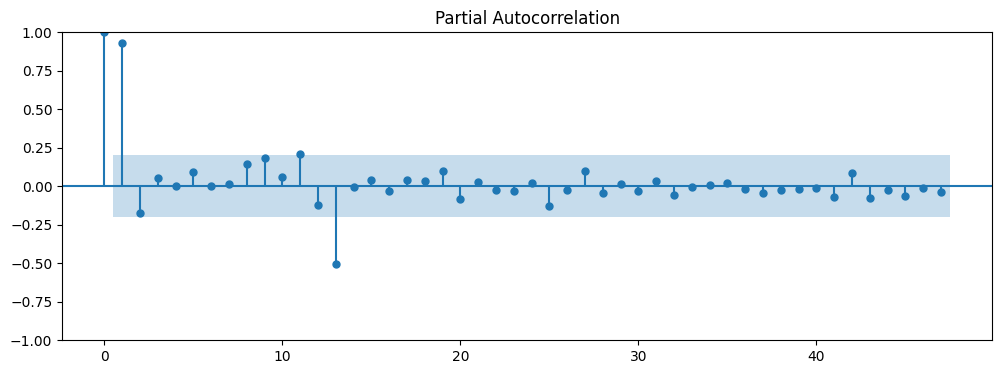

In [55]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Passengers,lags=95)
    tsa_plots.plot_pacf(df.Passengers,lags=47)
    plt.show()

### Lets Interpolate the data to show each and every day



In [31]:
upsampled = df.resample('D').mean()
print(upsampled.head(15))



            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


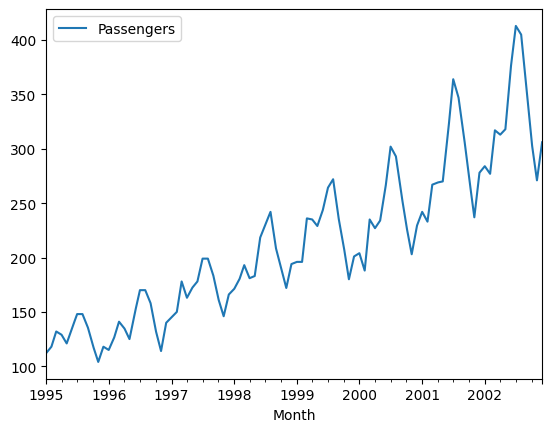

In [32]:
# Interpolate the missing value
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()


### Applying Transformations

### Log transform

In [33]:
df1=pd.DataFrame(interpolated)
df1.columns=['Passengers']
df1['Passengers']=np.log(df1['Passengers'])


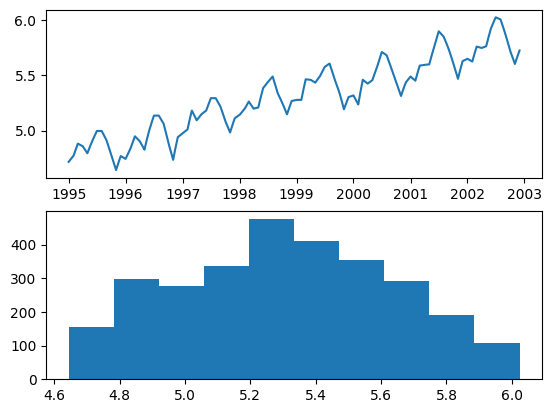

In [35]:
# Line plot
plt.subplot(211)
plt.plot(df1['Passengers'])
# Histogram
plt.subplot(212)
plt.hist(df1['Passengers'])
plt.show()


In [39]:
air["Date"]=pd.to_datetime(air.Month,format="%b-%y")
air["Months"]=air.Date.dt.strftime("%b")
air["Year"]=air.Date.dt.strftime("%Y")



In [40]:
air# seperated all the dates

,Month,Passengers,Date,Months,Year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


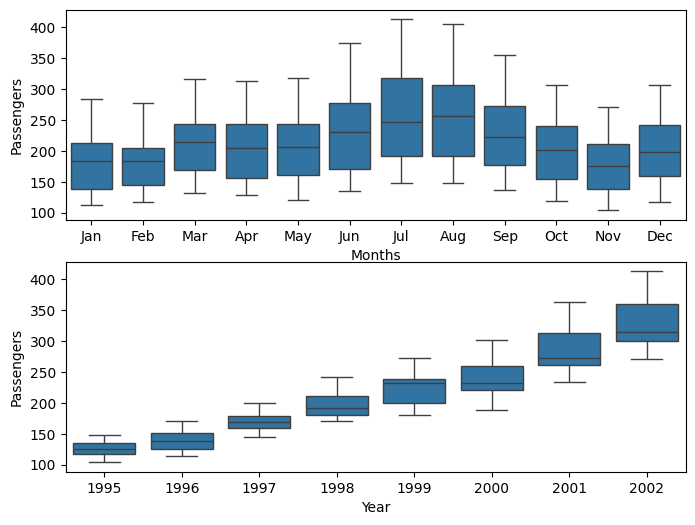

In [41]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='Months', y='Passengers', data=air)
plt.subplot(212)
sns.boxplot(x='Year', y='Passengers', data=air);

In [42]:
Month_Dummies = pd.DataFrame(pd.get_dummies(air['Months']))
air1 = pd.concat([air,Month_Dummies],axis = 1)

In [43]:
air1["t"] = np.arange(1,97)
air1["t_squared"] = air1["t"]*air1["t"]
air1["Log_Passengers"] = np.log(air1["Passengers"])


In [44]:
air1 #Creating dummy variables for each Month

,Month,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,False,False,False,False,False,False,False,False,True,False,False,False,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,False,True,False,False,False,False,False,False,False,False,False,False,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,False,False,False,False,False,False,False,False,False,False,False,True,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,False,False,False,False,False,False,False,False,False,False,True,False,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,False,False,False,False,False,False,False,False,False,True,False,False,95,9025,5.602119


<Axes: xlabel='Year', ylabel='Passengers'>

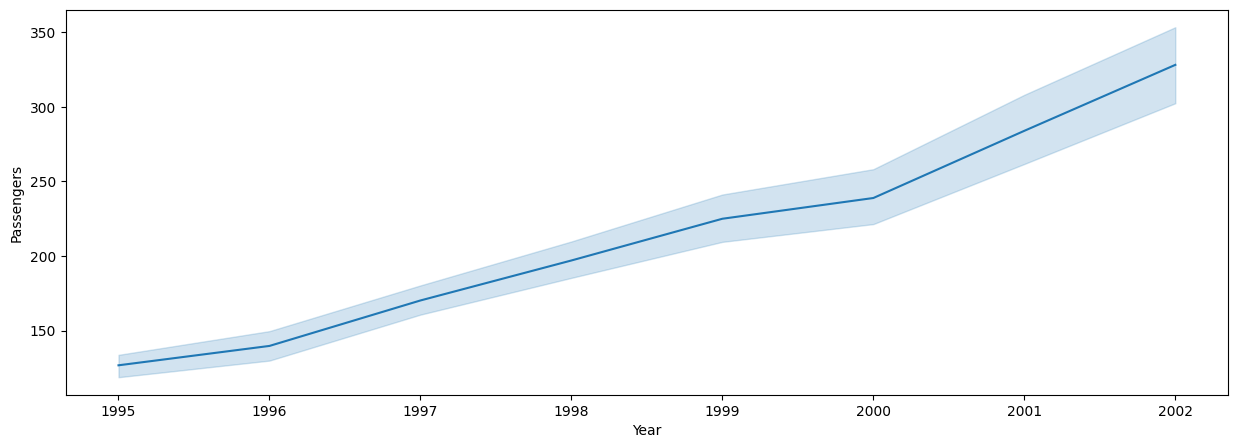

In [47]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Year",y="Passengers",data=air)

## Moving Average

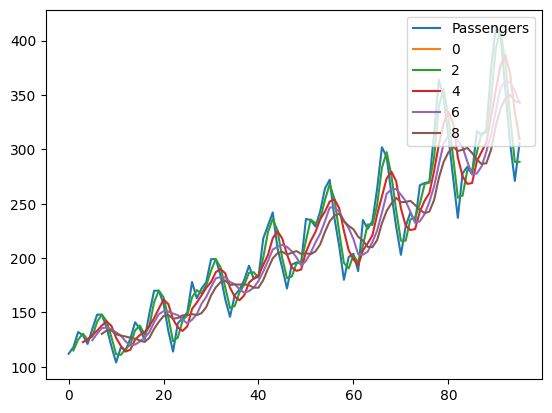

In [52]:
air.Passengers.plot()
for i in range(0,10,2):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=1);

## Train Test Split

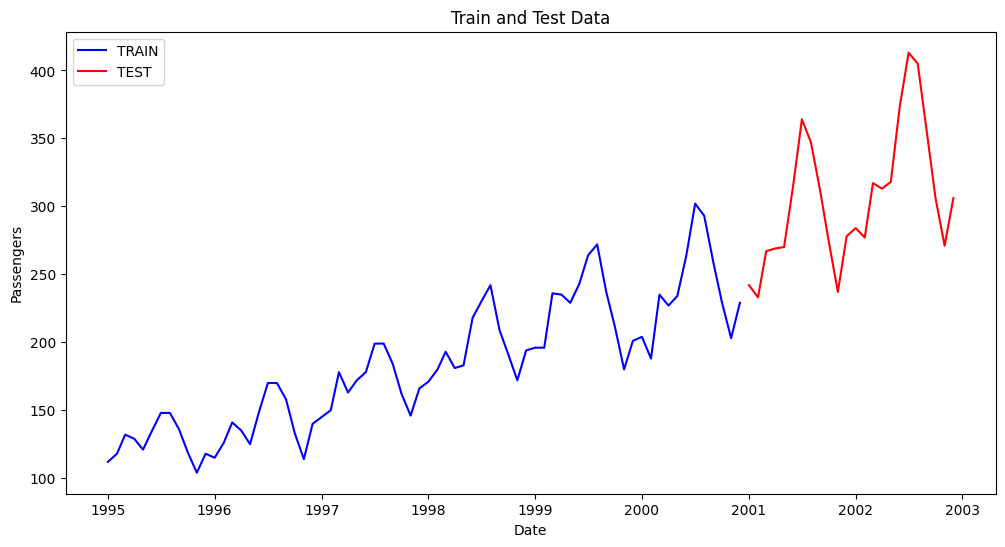

In [69]:
size = 72
train_data = df[:size]
test_data = df[size:]

# Plot both training and test data 
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Passengers'], label='TRAIN', color='blue')
plt.plot(test_data.index, test_data['Passengers'], label='TEST', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Train and Test Data')
plt.show()


## ARIMA

In [66]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

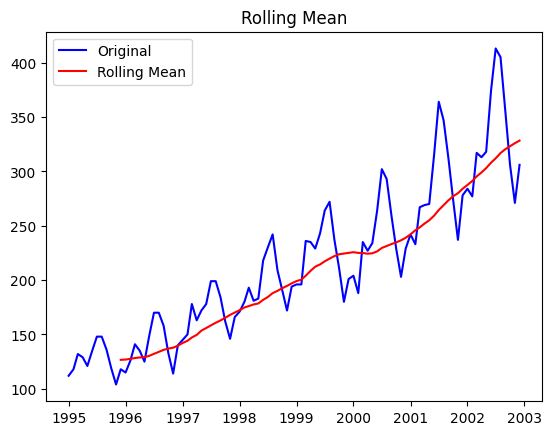

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [71]:
from statsmodels.tsa.stattools import adfuller
sales= pd.DataFrame()
sales['Passengers'] = df[['Passengers']]
test_stationarity(sales)

In [75]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [76]:
adf_test(sales)

Fail to reject the null hypothesis
Data is non-stationary


Log Transform

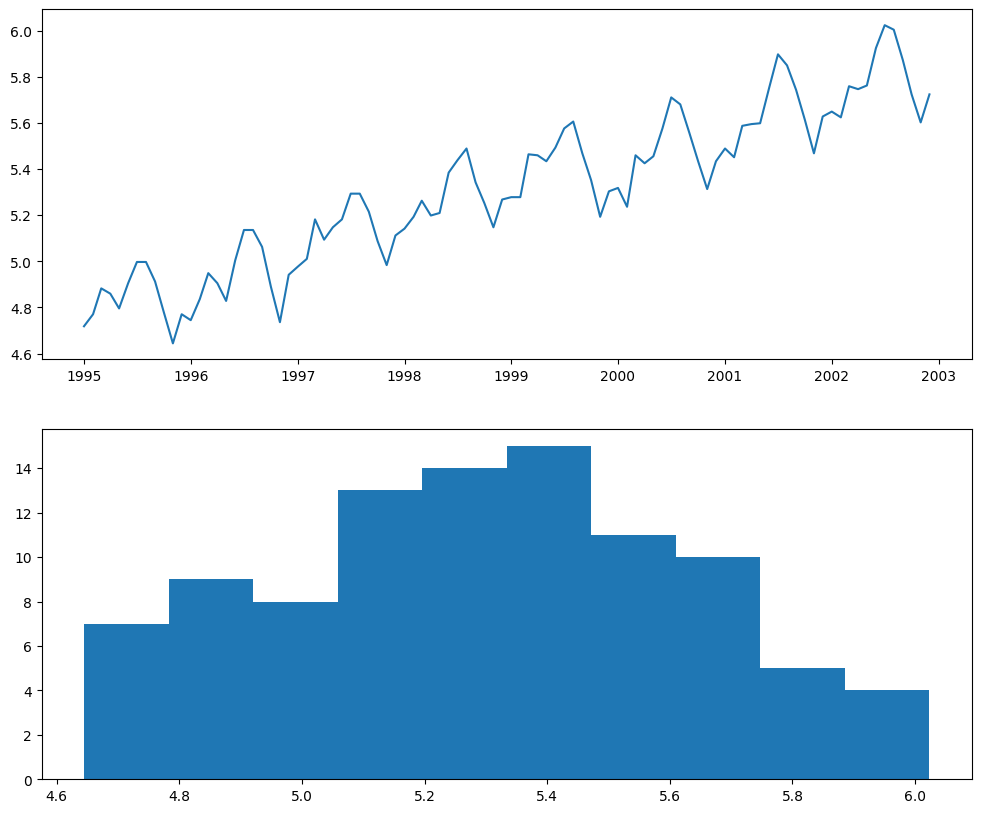

In [99]:
log = pd.DataFrame()
log = df[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])
#Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()



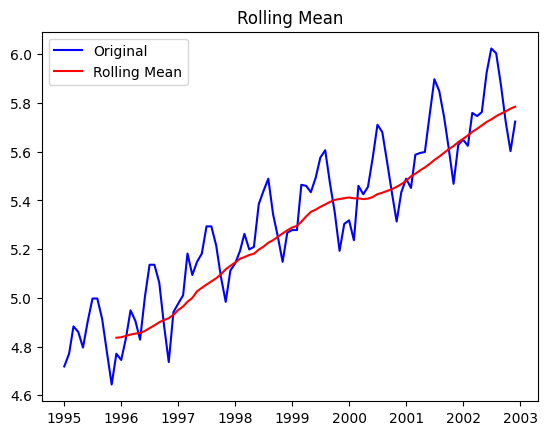

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [100]:
test_stationarity(log)

In [101]:
adf_test(log)

Fail to reject the null hypothesis
Data is non-stationary


## We need to make the data Stationary to use AR algo(Arima and Sarima)

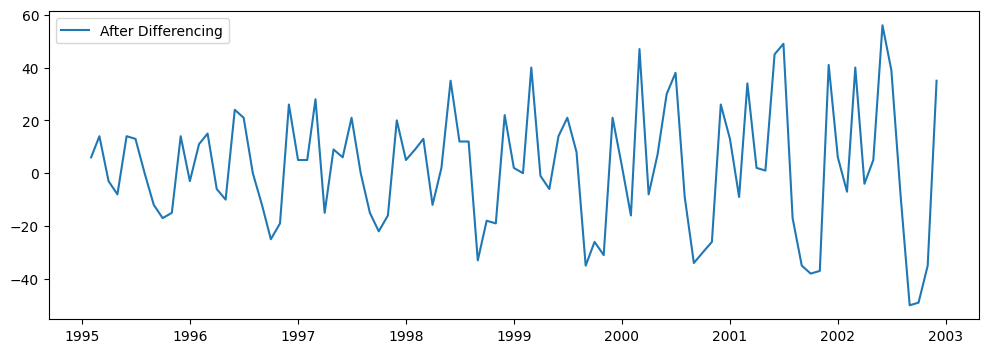

In [78]:
differencing = df - df.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

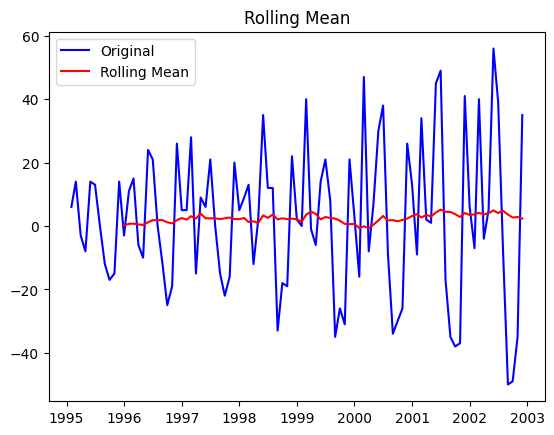

Results of Dickey Fuller Test:
Test Statistic                 -2.150002
p-value                         0.224889
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [80]:
test_stationarity(differencing)

In [81]:
adf_test(differencing)

Fail to reject the null hypothesis
Data is non-stationary


### Seasonal Differencing

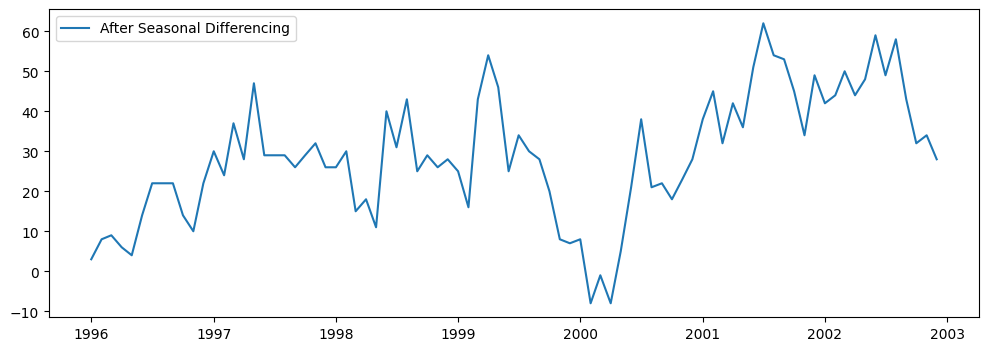

In [83]:
seasonal_differencing = df - df.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

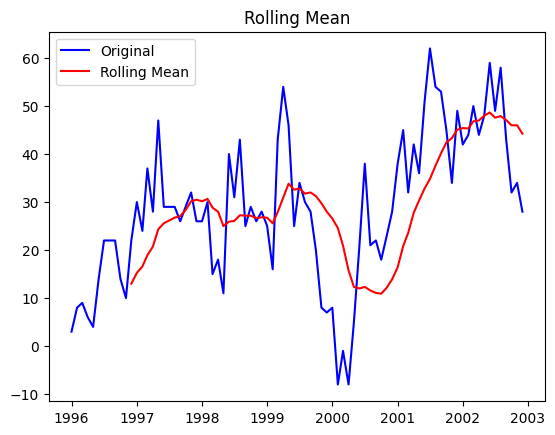

Results of Dickey Fuller Test:
Test Statistic                 -2.690004
p-value                         0.075784
#Lags Used                      1.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [84]:
test_stationarity(seasonal_differencing)

In [85]:
adf_test(differencing)

Fail to reject the null hypothesis
Data is non-stationary


,Passengers
Month,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


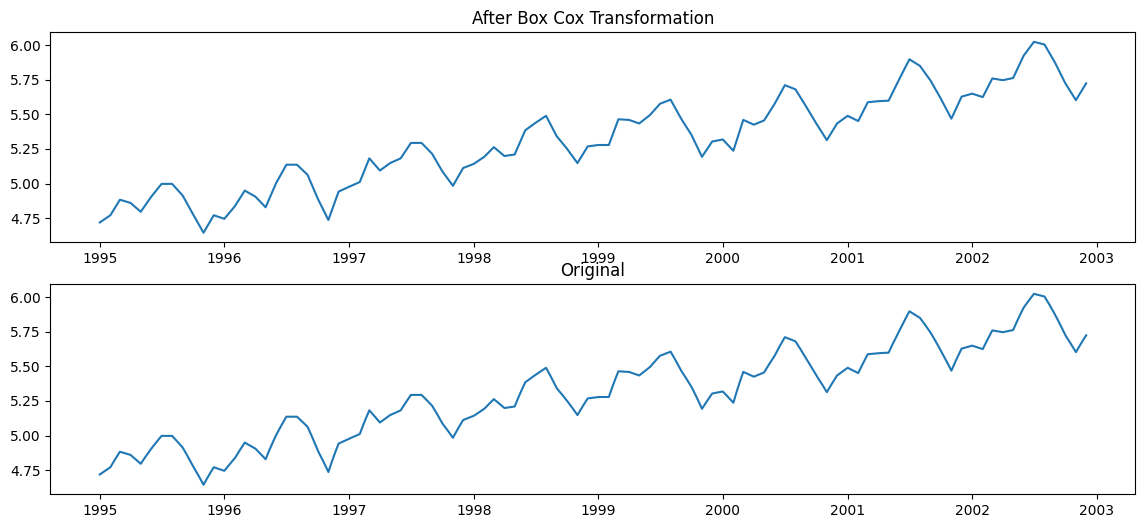

In [87]:
# Box Cox Transformation
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(df['Passengers'], lmbda=0), df.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(df1, label='original')
axis[1].set_title('Original')
plt.show()

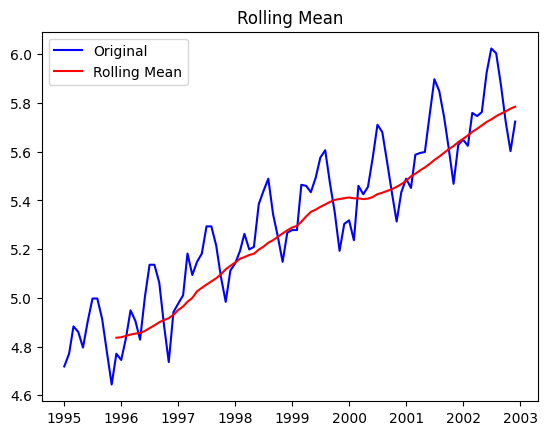

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [88]:
test_stationarity(data_boxcox)

In [89]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


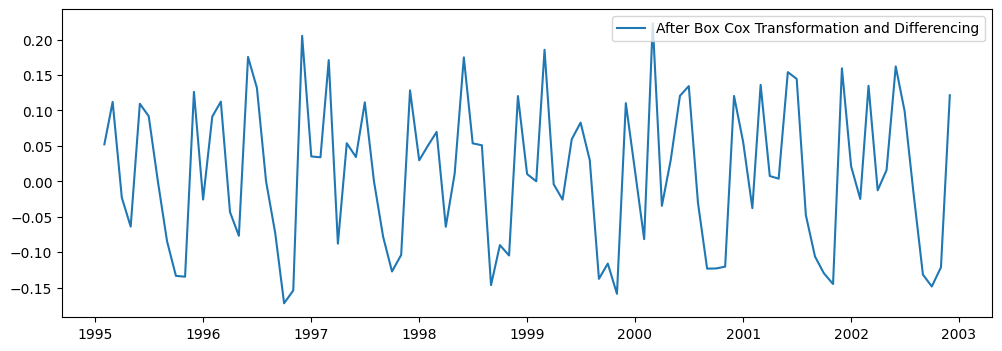

In [90]:
# Using Differencing on boxcox data

data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()


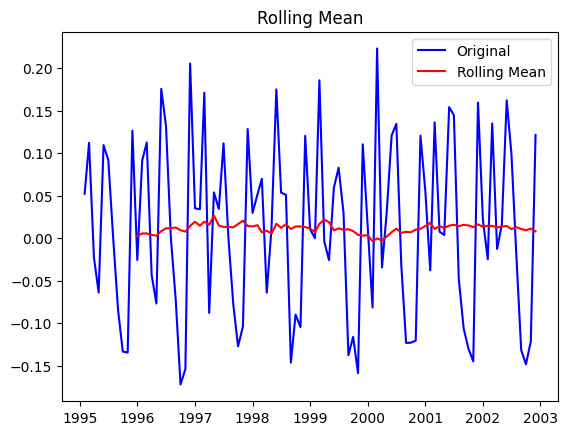

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [91]:
#check this log transfered data with function
test_stationarity(data_boxcox_diff)

## Good enough, we can go for ARIMA hypertuning

In [93]:
# grid search ARIMA parameters for a time series
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [103]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse





# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
evaluate_models(data_boxcox_diff.Passengers, p_values, d_values, q_values)


In [104]:
train_data_boxcox = data_boxcox[:size]
test_data_boxcox = data_boxcox[size:]
train_data_boxcox_diff = data_boxcox_diff[:size]
test_data_boxcox_diff = data_boxcox_diff[size:]


model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()
# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])
# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])


/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_715953/2418668660.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])


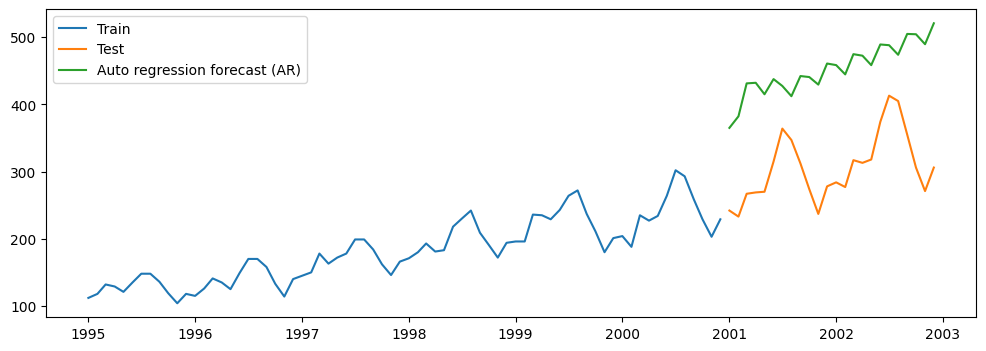

In [105]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

## Model evaluation

In [106]:
rmse_ARIMA = np.sqrt(mean_squared_error(test_data, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_ARIMA

152.57

In [108]:
model_residual = model_fit.resid
model_residual.mean()


-0.005710683617502512

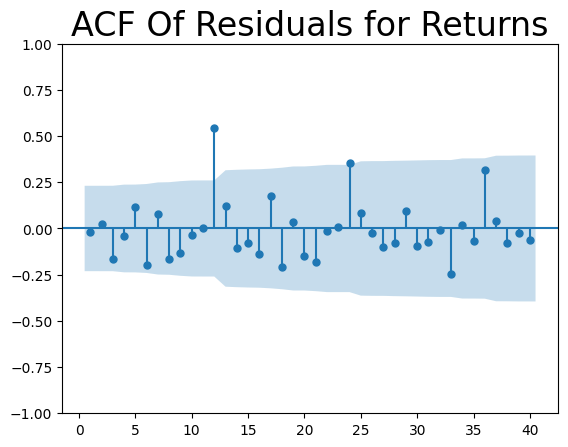

In [109]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()


## Using SARIMA on the same box_cox transformed data

In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.32501D+00    |proj g|=  4.45863D+00

At iterate    5    f= -1.34824D+00    |proj g|=  1.67534D-01

At iterate   10    f= -1.36571D+00    |proj g|=  1.77412D+00

At iterate   15    f= -1.36767D+00    |proj g|=  4.15616D-02

At iterate   20    f= -1.36909D+00    |proj g|=  6.69733D-01

At iterate   25    f= -1.37064D+00    |proj g|=  4.53600D-01


 This problem is unconstrained.



At iterate   30    f= -1.37767D+00    |proj g|=  9.17309D-02

At iterate   35    f= -1.37857D+00    |proj g|=  4.64147D-01

At iterate   40    f= -1.38062D+00    |proj g|=  1.45688D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     54      1     0     0   1.457D-02  -1.381D+00
  F =  -1.3806232508797702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [113]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])



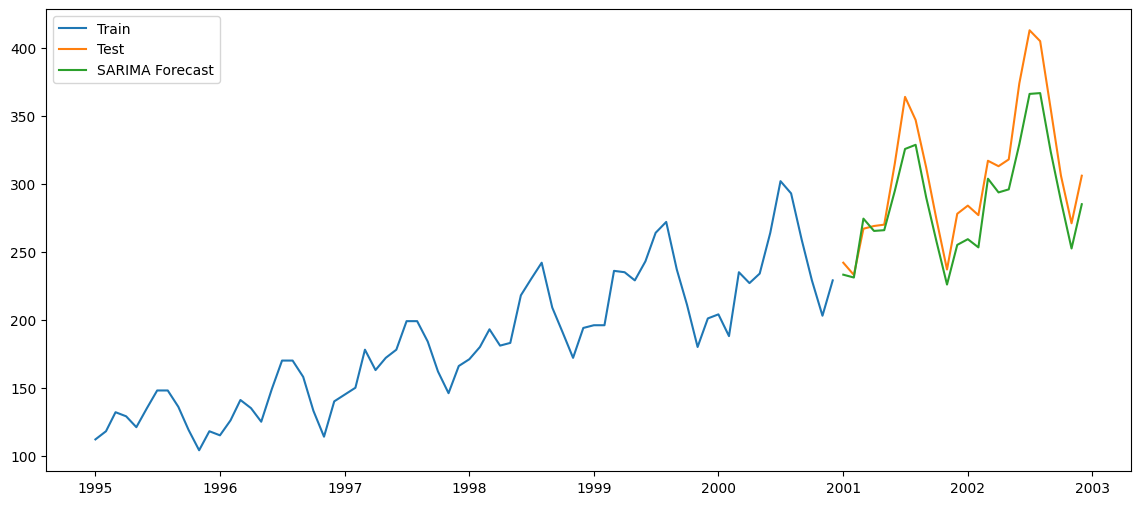

In [114]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

## Model Evaluation

In [118]:
#RMSE
rmse_SARIMA = np.sqrt(mean_squared_error(test_data, y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
rmse_SARIMA


23.92

In [120]:
#MAPE
mape_sarima = round(np.mean(np.abs((test_data.Passengers - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data.Passengers)*100),2)
mape_sarima

6.42

In [129]:
# Linear Model
Train = air1.head(72)
Test = air1.tail(24)


linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

51.667792995646266

In [130]:
# Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.55232894600461

In [131]:
# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

51.99073640155397

In [132]:
#Multiplicative Seasonality

Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

132.18762800263474

In [133]:
#Multiplicative additive seasonality

Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.714670246780887

In [134]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,rmse_linear
1,rmse_Exp,rmse_Exp
2,rmse_Quad,rmse_Quad
3,rmse_add_sea,rmse_add_sea
4,rmse_add_sea_quad,rmse_add_sea_quad
5,rmse_Mult_sea,rmse_Mult_sea
6,rmse_Mult_add_sea,rmse_Mult_add_sea


In [145]:
#Prediction on a new and unknown data

t = np.arange(93,104)
t

t_squared=np.array(t*t)
t_squared


Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01','2003-08-01','2003-09-01','2003-10-01','2003-10-01']})
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)


newdata = pd.concat([Month,df],axis=1)
newdata



,Month,t,t_squared
0,2003-01-01,93,8649
1,2003-02-01,94,8836
2,2003-03-01,95,9025
3,2003-04-01,96,9216
4,2003-05-01,97,9409
5,2003-06-01,98,9604
6,2003-07-01,99,9801
7,2003-08-01,100,10000
8,2003-09-01,101,10201
9,2003-10-01,102,10404


In [146]:
model_full = smf.ols('Passengers~t',data=air1).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new


0     317.603036
1     319.937749
2     322.272461
3     324.607174
4     326.941886
5     329.276598
6     331.611311
7     333.946023
8     336.280736
9     338.615448
10    340.950161
dtype: float64

In [147]:
newdata["forecasted_passengers"]=pd.Series(pred_new)

newdata


,Month,t,t_squared,forecasted_passengers
0,2003-01-01,93,8649,317.603036
1,2003-02-01,94,8836,319.937749
2,2003-03-01,95,9025,322.272461
3,2003-04-01,96,9216,324.607174
4,2003-05-01,97,9409,326.941886
5,2003-06-01,98,9604,329.276598
6,2003-07-01,99,9801,331.611311
7,2003-08-01,100,10000,333.946023
8,2003-09-01,101,10201,336.280736
9,2003-10-01,102,10404,338.615448


### Multiplicative Additive Seasonality  gives us the lowers RMSE for the prediction which is about 11